In [1]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [2]:
# ================================================================== #
#                         Table of Contents                          #
# ================================================================== #

# 1. Basic autograd example 1               
# 2. Basic autograd example 2               
# 3. Loading data from numpy                
# 4. Input pipline                          
# 5. Input pipline for custom dataset       
# 6. Pretrained model                       
# 7. Save and load model                



In [4]:
# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #

x = torch.tensor(1.,requires_grad = True)
w = torch.tensor(2.,requires_grad = True)
b = torch.tensor(3.,requires_grad = True)

y = x * w + b

y.backward()

print("x gradient =", x.grad)
print("w gradient =", w.grad)
print("b gradient =", b.grad)

x gradient = tensor(2.)
w gradient = tensor(1.)
b gradient = tensor(1.)


In [7]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

x = torch.randn(10,3)
y = torch.randn(10,2)

print( "x = ", x)
print( "y = ", y)

linear = nn.Linear(3,2)

print("w:", linear.weight)
print("b:", linear.bias)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.01)

pred = linear(x)

loss = criterion(pred, y)
print("loss:", loss.item())

loss.backward()

print("dl/dw: ", linear.weight.grad)
print("dl/db: ", linear.bias.grad)

optimizer.step()

pred = linear(x)
loss = criterion(pred, y)
print("Loss after 1 step optimization:   ", loss.item())

x =  tensor([[ 1.7220, -1.1482, -1.3160],
        [-1.7144, -1.8571,  2.6035],
        [-2.0819, -0.6743, -1.8800],
        [ 2.1677, -0.3151, -1.4194],
        [ 0.1227,  0.4405,  1.9622],
        [-0.5656,  0.3010, -1.2531],
        [ 0.2538,  0.1912, -1.0306],
        [-1.3772,  0.2618,  0.5164],
        [ 0.8589,  0.2659, -1.5892],
        [ 0.0446,  0.4229, -0.1591]])
y =  tensor([[ 0.0187, -0.5247],
        [ 1.0300,  0.7395],
        [-1.6075, -0.0221],
        [-0.5825,  0.0031],
        [ 1.8722, -0.3758],
        [-0.7816,  0.6194],
        [-1.1351, -1.0284],
        [-0.8887,  0.4947],
        [-0.2153, -1.5421],
        [-1.1416, -0.3806]])
w: Parameter containing:
tensor([[-0.0646, -0.0359,  0.4017],
        [ 0.0928, -0.4277,  0.2219]], requires_grad=True)
b: Parameter containing:
tensor([ 0.2854, -0.0153], requires_grad=True)
loss: 0.6460554599761963
dl/dw:  tensor([[-0.6035, -0.0535, -0.3498],
        [ 0.4111, -0.1352,  0.0312]])
dl/db:  tensor([0.4966, 0.1923])
Loss 

#### NN.Linear

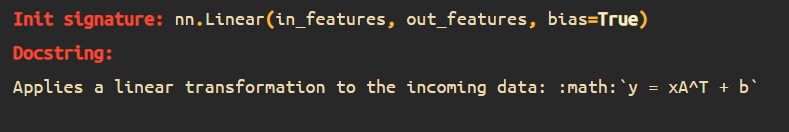



#### Criterion
We measure accuracy with criterion function. we selected Mean Square Error Loss. 

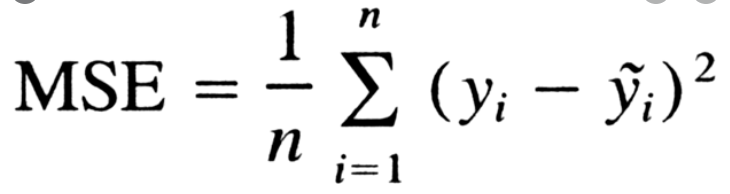

#### Optimzer 
Optimization methods are used to find the optimum value for the solution of nonlinear problems.
we selected Stochastic gradient descent optimizer. 

In Gradient Descent optimization, we compute the cost gradient based on the complete training set; hence, we sometimes also call it batch gradient descent. In case of very large datasets, using Gradient Descent can be quite costly since we are only taking a single step for one pass over the training set -- thus, the larger the training set, the slower our algorithm updates the weights and the longer it may take until it converges to the global cost minimum (note that the SSE cost function is convex).

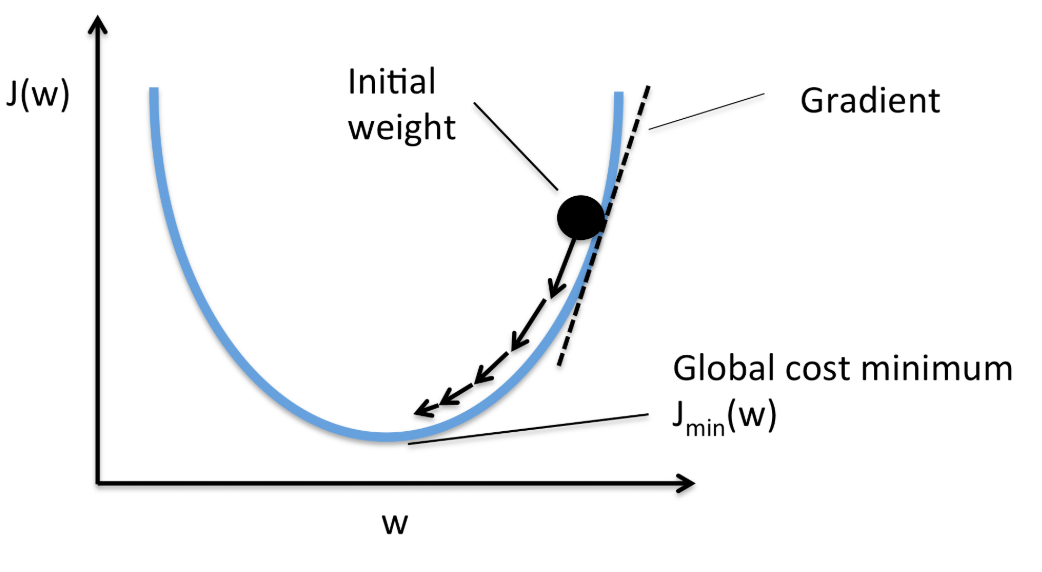


In [9]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

x = torch.randn(10,3)
y = torch.randn(10,2)

linear = nn.Linear(3,2)
print("w:", linear.weight)
print("b: ", linear.bias)

criterion = nn.MSELoss()
optimzer = torch.optim.SGD(linear.parameters(), lr = 0.01)

pred = linear(x)

loss = criterion(pred, y)
print("loss: ", loss.item())

loss.backward()

print("dl/dw: ", linear.weight.grad)
print("dl/db: ", linear.bias.grad)

optimizer.step()

pred = linear(x)

loss = criterion(pred, y)

print("loss after  one optimization: ", loss.item())

w: Parameter containing:
tensor([[ 0.1514, -0.3168,  0.2645],
        [-0.3921,  0.2006, -0.0920]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1374, -0.0745], requires_grad=True)
loss:  1.1382949352264404
dl/dw:  tensor([[-0.2280,  0.3841,  0.0008],
        [-0.4125,  0.0759, -0.3921]])
dl/db:  tensor([0.0610, 0.4637])
loss after  one optimization:  1.1382949352264404


In [12]:
# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

x = np.array([[1,2], [3,4]])

y = torch.from_numpy(x)

z = y.numpy()

print("x : ",x)
print("y : ",y)
print("z : ",z)

x :  [[1 2]
 [3 4]]
y :  tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
z :  [[1 2]
 [3 4]]


In [13]:
# ================================================================== #
#                         4. Input pipeline                           #
# ================================================================== #

train_dataset = torchvision.datasets.CIFAR10(root ='../../data/',
                                            train = True,
                                            transform = transforms.ToTensor(),
                                            download = True)

image, label = train_dataset[0]

print(image.size())
print(label)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size= 64,
                                          shuffle= True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

images, labels = data_iter.next()

for images, labels in train_loader:
    pass

0it [00:00, ?it/s]

100%|███████████████████████████████████████████████████████████████▉| 170450944/170498071 [05:38<00:00, 936521.47it/s]

Extracting ../../data/cifar-10-python.tar.gz to ../../data/
torch.Size([3, 32, 32])
6


170500096it [05:50, 936521.47it/s]                                                                                     

In [16]:
# ================================================================== #
#                5. Input pipeline for custom dataset                 #
# ================================================================== #

class customDataset(torch.utils.data.Dataset):
    def __init__(self):
        pass
    def __getitem__(self, index):
        pass
    def __len__(self):
        return 0 
customDataset = customDataset()

train_loader = torch.utils.data.DataLoader(dataset = customDataset,
                                          batch_size= 64)



In [17]:
# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

resnet = torchvision.models.resnet18(pretrained=True)

for param in resnet.parameters():
    param.requires_grad = False
    
resnet.fc = nn.Linear(resnet.fc.in_features, 100)

images = torch.randn(64, 3, 224, 224)

outputs = resnet(images)

print(outputs.size())


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\ENES DORUK/.cache\torch\checkpoints\resnet18-5c106cde.pth

  0%|                                                                                      | 0.00/44.7M [00:00<?, ?B/s]
  0%|                                                                              | 56.0k/44.7M [00:00<01:26, 543kB/s]
  0%|▎                                                                              | 184k/44.7M [00:00<01:13, 631kB/s]
  1%|▌                                                                              | 344k/44.7M [00:00<01:00, 773kB/s]
  1%|█                                                                              | 632k/44.7M [00:00<00:47, 977kB/s]
  2%|█▎                                                                             | 768k/44.7M [00:00<00:49, 936kB/s]
  2%|█▌                                                                            | 904k/44.7M [00:00<00:45, 1.01MB/s]
  2%|█▋         

 40%|██████████████████████████████▉                                              | 18.0M/44.7M [00:08<00:10, 2.78MB/s]
 41%|███████████████████████████████▌                                             | 18.3M/44.7M [00:08<00:09, 2.98MB/s]
 42%|████████████████████████████████▏                                            | 18.6M/44.7M [00:08<00:09, 2.86MB/s]
 42%|████████████████████████████████▋                                            | 18.9M/44.7M [00:08<00:09, 2.79MB/s]
 43%|█████████████████████████████████▏                                           | 19.3M/44.7M [00:08<00:09, 2.94MB/s]
 44%|█████████████████████████████████▋                                           | 19.5M/44.7M [00:09<00:10, 2.58MB/s]
 44%|██████████████████████████████████▏                                          | 19.8M/44.7M [00:09<00:10, 2.60MB/s]
 45%|██████████████████████████████████▊                                          | 20.2M/44.7M [00:09<00:09, 2.82MB/s]
 46%|███████████████████████████████████

 84%|████████████████████████████████████████████████████████████████▋            | 37.5M/44.7M [00:17<00:05, 1.37MB/s]
 84%|████████████████████████████████████████████████████████████████▉            | 37.7M/44.7M [00:17<00:04, 1.52MB/s]
 85%|█████████████████████████████████████████████████████████████████▎           | 37.9M/44.7M [00:17<00:04, 1.67MB/s]
 85%|█████████████████████████████████████████████████████████████████▊           | 38.2M/44.7M [00:17<00:04, 1.68MB/s]
 86%|██████████████████████████████████████████████████████████████████▏          | 38.4M/44.7M [00:17<00:03, 1.72MB/s]
 86%|██████████████████████████████████████████████████████████████████▌          | 38.6M/44.7M [00:17<00:03, 1.86MB/s]
 87%|██████████████████████████████████████████████████████████████████▉          | 38.8M/44.7M [00:17<00:03, 1.58MB/s]
 87%|███████████████████████████████████████████████████████████████████▎         | 39.1M/44.7M [00:17<00:03, 1.80MB/s]
 88%|███████████████████████████████████

torch.Size([64, 100])


In [ ]:
# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

torch.save(resnet, 'model.ckpt')

model = torch.load('model.ckpt')

torch.save(resnet.state_dict(), 'params.ckpt')

resnet.load_state_dict(torch.load('params.ckpt'))